In [ ]:
import joblib

log_reg = joblib.load("logistic_regression.pkl")
dtree = joblib.load("decision_tree.pkl")
rf = joblib.load("random_forest.pkl")
svm_model = joblib.load("svm.pkl")


In [ ]:
# Handle missing values
df = df.fillna(df.mean())

# Features & Target (exactly same as Week 2 training)
X = df[["City","PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2",
        "O3","Benzene","Toluene","AQI"]]   # 13 features
y = df["AQI_Bucket"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


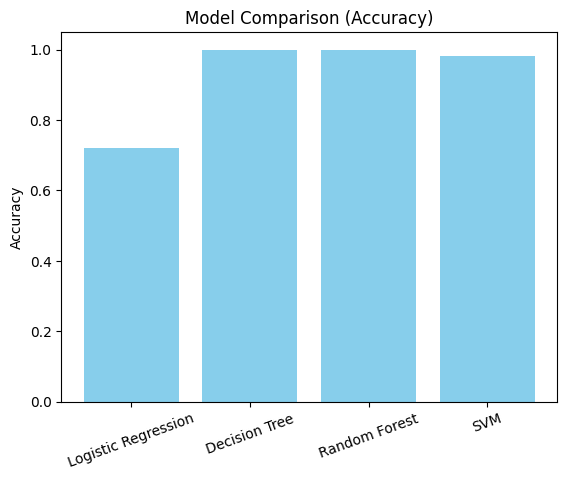

In [ ]:
plt.bar(results.keys(), results.values(), color="skyblue")
plt.title("Model Comparison (Accuracy)")
plt.ylabel("Accuracy")
plt.xticks(rotation=20)
plt.show()

In [ ]:
# saving best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

joblib.dump(best_model, "final_best_model.pkl")
print(f"✅ Final best model saved as final_best_model.pkl ({best_model_name})")

✅ Final best model saved as final_best_model.pkl (Decision Tree)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Random Forest tuning
param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3, n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

print("Best RF Params:", grid_rf.best_params_)
print("Best RF Score:", grid_rf.best_score_)

# SVM tuning
param_grid_svm = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"],
}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=3, n_jobs=-1, verbose=1)
grid_svm.fit(X_train, y_train)

print("Best SVM Params:", grid_svm.best_params_)
print("Best SVM Score:", grid_svm.best_score_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best RF Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best RF Score: 0.9994467003208785
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best SVM Params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM Score: 0.9997987952859204



----- Logistic Regression -----
Accuracy: 0.7199195171026157
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.06      0.11       282
           1       0.78      0.83      0.80      1745
           2       0.47      0.37      0.42       555
           3       0.78      0.89      0.83      1655
           4       0.63      0.60      0.62       271
           5       0.56      0.60      0.58       462

    accuracy                           0.72      4970
   macro avg       0.60      0.56      0.56      4970
weighted avg       0.70      0.72      0.70      4970



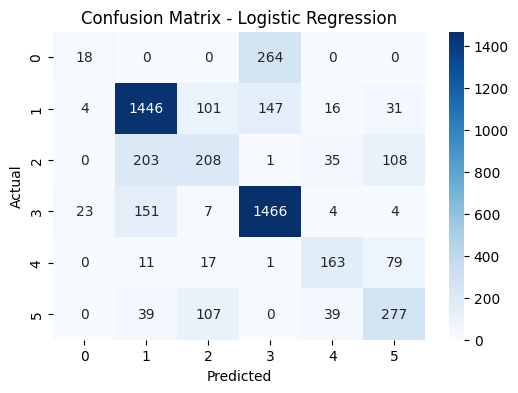


----- Decision Tree -----
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       1.00      1.00      1.00      1745
           2       1.00      1.00      1.00       555
           3       1.00      1.00      1.00      1655
           4       1.00      1.00      1.00       271
           5       1.00      1.00      1.00       462

    accuracy                           1.00      4970
   macro avg       1.00      1.00      1.00      4970
weighted avg       1.00      1.00      1.00      4970



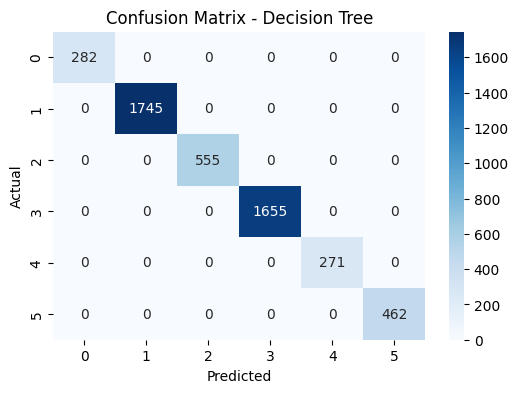


----- Random Forest -----
Accuracy: 0.9997987927565393
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       1.00      1.00      1.00      1745
           2       1.00      1.00      1.00       555
           3       1.00      1.00      1.00      1655
           4       1.00      1.00      1.00       271
           5       1.00      1.00      1.00       462

    accuracy                           1.00      4970
   macro avg       1.00      1.00      1.00      4970
weighted avg       1.00      1.00      1.00      4970



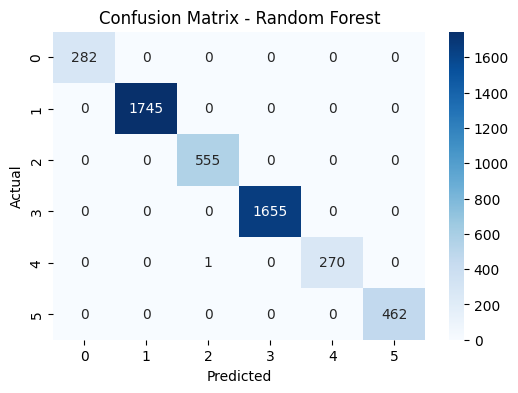


----- SVM -----
Accuracy: 0.9828973843058351
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95       282
           1       0.98      1.00      0.99      1745
           2       0.99      0.97      0.98       555
           3       0.98      0.99      0.98      1655
           4       1.00      0.96      0.98       271
           5       0.95      1.00      0.97       462

    accuracy                           0.98      4970
   macro avg       0.98      0.97      0.98      4970
weighted avg       0.98      0.98      0.98      4970



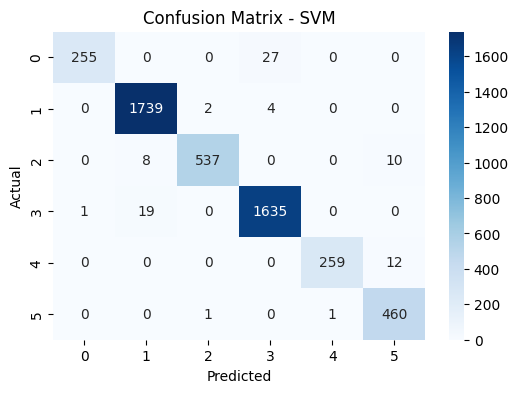

In [ ]:
# ----------------------------
# Step 4: Evaluate All Models
# ----------------------------
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dtree,
    "Random Forest": rf,
    "SVM": svm_model
}

results = {}

for name, model in models.items():
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"\n----- {name} -----")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, preds))
    results[name] = acc

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
# Save tuned SVM as final best model (overwrite old file)
best_model = grid_svm.best_estimator_

import joblib
joblib.dump(best_model, "final_best_model.pkl")

print("✅ Final best model saved as final_best_model.pkl (SVM with tuning)")


✅ Final best model saved as final_best_model.pkl (SVM with tuning)


In [ ]:
loaded_model = joblib.load("final_best_model.pkl")
print("Loaded model:", loaded_model)


Loaded model: SVC(C=1, kernel='linear')


Final Model Accuracy: 0.9995975855130784
Final Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       1.00      1.00      1.00      1745
           2       1.00      1.00      1.00       555
           3       1.00      1.00      1.00      1655
           4       1.00      1.00      1.00       271
           5       1.00      1.00      1.00       462

    accuracy                           1.00      4970
   macro avg       1.00      1.00      1.00      4970
weighted avg       1.00      1.00      1.00      4970



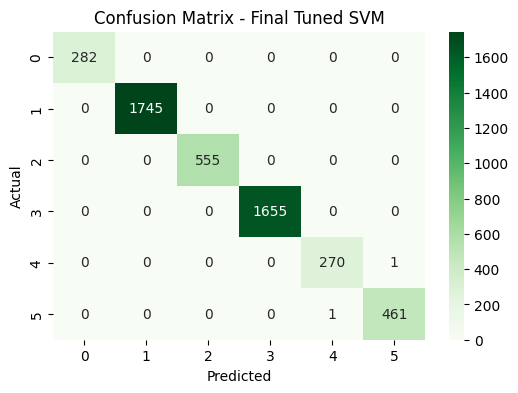

In [ ]:
final_preds = best_model.predict(X_test)
print("Final Model Accuracy:", accuracy_score(y_test, final_preds))
print("Final Classification Report:\n", classification_report(y_test, final_preds))

# Confusion Matrix
cm = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Final Tuned SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from google.colab import files

# Download final model file
files.download("final_best_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>